In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

## 1. 법정동 코드 가공

In [3]:
locCode = pd.read_excel('../data/법정동코드.xlsx')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


## 2. 실거래가 데이터 가공

In [4]:
apt = pd.read_csv('../data/2019년 서울 아파트 실거래가.csv', encoding="cp949")
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,"105,000",광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,"162,000",광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,"119,000",광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,"119,000",광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,"160,000",경희궁의아침4단지,150.48,11110,14,73


In [5]:
# 거래금액 컬럼의 콤마(,) 제거 후 데이터 타입 변경..int64로
apt["거래금액"]=apt["거래금액"].str.replace(",","")
apt["거래금액"]=apt["거래금액"].astype(np.int64)
apt["거래금액"]

0        105000
1        162000
2        119000
3        119000
4        160000
          ...  
68859     14500
68860     79750
68861     77800
68862     80000
68863     85000
Name: 거래금액, Length: 68864, dtype: int64

In [6]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.306)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시합니다.
apt["전용면적(평)"]=round(apt["전용면적"]/3.306,2)
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평)
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52
...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66


In [7]:
# 전용면적을 범주화 하기 위해 전용면적(평) 컬럼을 정수형으로 바꾼 새로운 컬럼을 생성합니다.
# 컬럼명 전용면적2(평)
apt["전용면적(평)2"]=np.floor(apt["전용면적"]/3.306).astype(int)
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25


In [8]:
def myrange(x):
    if(x%5==0):
        fl=x-5
        ci=x
        return "("+str(fl)+","+str(ci)+"]"
    ci=(x//5+1)*5
    fl=x//5*5
    return "("+str(fl)+","+str(ci)+"]"

myrange(45)

'(40,45]'

In [9]:
# 전용면적을 범주화 합니다.
# 컬럼명은 전용면적(평)3
bins=np.arange(0,86,5)
bins
apt['전용면적(평)3'] = pd.cut(apt['전용면적(평)2'], bins)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]"
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]"
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]"
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]"
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]"


In [10]:
# 범주화된 전용면적의 고유값을 확인합니다.
apt['전용면적(평)3'].unique()

[(25, 30], (45, 50], (35, 40], (40, 45], (0, 5], ..., (65, 70], (55, 60], (60, 65], (80, 85], (75, 80]]
Length: 17
Categories (17, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (65, 70] < (70, 75] < (75, 80] < (80, 85]]

In [11]:
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]"
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]"
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]"
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]"
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]"
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]"
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]"
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]"


In [12]:
locCode

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN
...,...,...,...,...,...,...,...
20551,5013032022,제주특별자치도,서귀포시,표선면,하천리,20060701,NaN
20552,5013032023,제주특별자치도,서귀포시,표선면,성읍리,20060701,NaN
20553,5013032024,제주특별자치도,서귀포시,표선면,가시리,20060701,NaN
20554,5013032025,제주특별자치도,서귀포시,표선면,세화리,20060701,NaN


In [13]:
dong=pd.DataFrame(apt["법정동"])
locmap=locCode[["읍면동명","시군구명"]]
locmap.rename(columns={"읍면동명":"법정동"},inplace=True)
locmap.dropna(inplace=True)
locmap.set_index("법정동")
keyval=locmap.set_index("법정동").transpose().loc["시군구명"].to_dict()
keyval
# apt["법정동"].map(keyval)

C:\cyh\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\cyh\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


{'청운동': '종로구',
 '신교동': '경산시',
 '궁정동': '종로구',
 '효자동': '포항시 남구',
 '창성동': '군산시',
 '통의동': '종로구',
 '적선동': '종로구',
 '통인동': '종로구',
 '누상동': '종로구',
 '누하동': '종로구',
 '옥인동': '종로구',
 '체부동': '종로구',
 '필운동': '종로구',
 '내자동': '종로구',
 '사직동': '천안시 동남구',
 '도렴동': '종로구',
 '당주동': '종로구',
 '내수동': '종로구',
 '세종로': '종로구',
 '신문로1가': '종로구',
 '신문로2가': '종로구',
 '청진동': '종로구',
 '서린동': '종로구',
 '수송동': '창원시 진해구',
 '중학동': '공주시',
 '종로1가': '중구',
 '공평동': '문경시',
 '관훈동': '종로구',
 '견지동': '종로구',
 '와룡동': '사천시',
 '권농동': '종로구',
 '운니동': '종로구',
 '익선동': '창원시 진해구',
 '경운동': '종로구',
 '관철동': '종로구',
 '인사동': '진주시',
 '낙원동': '춘천시',
 '종로2가': '중구',
 '팔판동': '종로구',
 '삼청동': '종로구',
 '안국동': '종로구',
 '소격동': '종로구',
 '화동': '종로구',
 '사간동': '종로구',
 '송현동': '안동시',
 '가회동': '종로구',
 '재동': '종로구',
 '계동': '진주시',
 '원서동': '종로구',
 '훈정동': '종로구',
 '묘동': '종로구',
 '봉익동': '종로구',
 '돈의동': '종로구',
 '장사동': '속초시',
 '관수동': '종로구',
 '종로3가': '종로구',
 '인의동': '창원시 진해구',
 '예지동': '종로구',
 '원남동': '종로구',
 '연지동': '정읍시',
 '종로4가': '종로구',
 '효제동': '종로구',
 '종로5가': '종로구',
 '종로6가': '종로구',
 '이화동': '계양구',
 '

In [14]:
# locmap.reset_index("법정동")
locmap.dropna(inplace=True)
locmap.set_index("법정동")
# locmap=locmap.set_index("법정동").to_dict()

C:\cyh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,시군구명
법정동,
청운동,종로구
신교동,종로구
궁정동,종로구
효자동,종로구
창성동,종로구
...,...
표선면,서귀포시
표선면,서귀포시
표선면,서귀포시


In [15]:
locmap.set_index("법정동").transpose().loc["시군구명"].to_dict()

{'청운동': '종로구',
 '신교동': '경산시',
 '궁정동': '종로구',
 '효자동': '포항시 남구',
 '창성동': '군산시',
 '통의동': '종로구',
 '적선동': '종로구',
 '통인동': '종로구',
 '누상동': '종로구',
 '누하동': '종로구',
 '옥인동': '종로구',
 '체부동': '종로구',
 '필운동': '종로구',
 '내자동': '종로구',
 '사직동': '천안시 동남구',
 '도렴동': '종로구',
 '당주동': '종로구',
 '내수동': '종로구',
 '세종로': '종로구',
 '신문로1가': '종로구',
 '신문로2가': '종로구',
 '청진동': '종로구',
 '서린동': '종로구',
 '수송동': '창원시 진해구',
 '중학동': '공주시',
 '종로1가': '중구',
 '공평동': '문경시',
 '관훈동': '종로구',
 '견지동': '종로구',
 '와룡동': '사천시',
 '권농동': '종로구',
 '운니동': '종로구',
 '익선동': '창원시 진해구',
 '경운동': '종로구',
 '관철동': '종로구',
 '인사동': '진주시',
 '낙원동': '춘천시',
 '종로2가': '중구',
 '팔판동': '종로구',
 '삼청동': '종로구',
 '안국동': '종로구',
 '소격동': '종로구',
 '화동': '종로구',
 '사간동': '종로구',
 '송현동': '안동시',
 '가회동': '종로구',
 '재동': '종로구',
 '계동': '진주시',
 '원서동': '종로구',
 '훈정동': '종로구',
 '묘동': '종로구',
 '봉익동': '종로구',
 '돈의동': '종로구',
 '장사동': '속초시',
 '관수동': '종로구',
 '종로3가': '종로구',
 '인의동': '창원시 진해구',
 '예지동': '종로구',
 '원남동': '종로구',
 '연지동': '정읍시',
 '종로4가': '종로구',
 '효제동': '종로구',
 '종로5가': '종로구',
 '종로6가': '종로구',
 '이화동': '계양구',
 '

In [16]:
keyval=locmap.set_index("법정동").transpose().loc["시군구명"].to_dict()
keyval

{'청운동': '종로구',
 '신교동': '경산시',
 '궁정동': '종로구',
 '효자동': '포항시 남구',
 '창성동': '군산시',
 '통의동': '종로구',
 '적선동': '종로구',
 '통인동': '종로구',
 '누상동': '종로구',
 '누하동': '종로구',
 '옥인동': '종로구',
 '체부동': '종로구',
 '필운동': '종로구',
 '내자동': '종로구',
 '사직동': '천안시 동남구',
 '도렴동': '종로구',
 '당주동': '종로구',
 '내수동': '종로구',
 '세종로': '종로구',
 '신문로1가': '종로구',
 '신문로2가': '종로구',
 '청진동': '종로구',
 '서린동': '종로구',
 '수송동': '창원시 진해구',
 '중학동': '공주시',
 '종로1가': '중구',
 '공평동': '문경시',
 '관훈동': '종로구',
 '견지동': '종로구',
 '와룡동': '사천시',
 '권농동': '종로구',
 '운니동': '종로구',
 '익선동': '창원시 진해구',
 '경운동': '종로구',
 '관철동': '종로구',
 '인사동': '진주시',
 '낙원동': '춘천시',
 '종로2가': '중구',
 '팔판동': '종로구',
 '삼청동': '종로구',
 '안국동': '종로구',
 '소격동': '종로구',
 '화동': '종로구',
 '사간동': '종로구',
 '송현동': '안동시',
 '가회동': '종로구',
 '재동': '종로구',
 '계동': '진주시',
 '원서동': '종로구',
 '훈정동': '종로구',
 '묘동': '종로구',
 '봉익동': '종로구',
 '돈의동': '종로구',
 '장사동': '속초시',
 '관수동': '종로구',
 '종로3가': '종로구',
 '인의동': '창원시 진해구',
 '예지동': '종로구',
 '원남동': '종로구',
 '연지동': '정읍시',
 '종로4가': '종로구',
 '효제동': '종로구',
 '종로5가': '종로구',
 '종로6가': '종로구',
 '이화동': '계양구',
 '

In [17]:
apt["법정동"].map(keyval)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
68859    NaN
68860    NaN
68861    NaN
68862    NaN
68863    NaN
Name: 법정동, Length: 68864, dtype: object

## 3. 데이타 프레임 병합

In [18]:
locCodeSeoul=locCode[locCode["시도명"].str.contains("서울")]
locCodeSeoul.rename({"읍면동명":"법정동"},axis='columns',inplace=True)


C:\cyh\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
locCodeSeoul

,법정동코드,시도명,시군구명,법정동,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN
...,...,...,...,...,...,...,...
488,1174010600,서울특별시,강동구,둔촌동,NaN,19880423,NaN
489,1174010700,서울특별시,강동구,암사동,NaN,19880423,NaN
490,1174010800,서울특별시,강동구,성내동,NaN,19880423,NaN
491,1174010900,서울특별시,강동구,천호동,NaN,19880423,NaN


In [20]:
# # locCodeSeoul.set_index("법정동",inplace=True)
# # locCodeSeoul
# apt.set_index("법정동",inplace=True)

In [21]:
apt["거래금액"]

0        105000
1        162000
2        119000
3        119000
4        160000
          ...  
68859     14500
68860     79750
68861     77800
68862     80000
68863     85000
Name: 거래금액, Length: 68864, dtype: int64

In [22]:
seoul_locCode = locCode[locCode['시도명']=='서울특별시']
seoul_locCode.rename(columns={"법정동코드":"지역코드"},inplace=True)
seoul_locCode["지역코드"]=seoul_locCode["지역코드"]//100000
seoul_locCode = seoul_locCode.loc[:,['지역코드','시군구명']]
seoul_locCode
seoul_locCode = seoul_locCode.drop_duplicates(['지역코드'], keep='last')

seoul_locCode
final = pd.merge(apt, seoul_locCode, on='지역코드', how='inner')
final

C:\cyh\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\cyh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",강동구
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",강동구
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",강동구
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",강동구


## 4. 데이타 분석


5. 거래가 가장 많은 동네, 월별 거래가 가장 많은 달-> 거래량과 거래금액의 상관관계

In [23]:
countByArea = final.pivot_table(index="시군구명",aggfunc="count",values="거래금액")
countByArea.columns=["거래 수"]
countByArea.sort_values(by="거래 수",ascending=True)
countByMonth= final.pivot_table(index="거래월",aggfunc="count",values="거래금액")
countByMonth.columns=["거래 수"]
countByMonth.sort_values(by="거래 수",ascending=True)
countByPrice=final.pivot_table(index="거래월",values="거래금액",aggfunc="mean")
countByPrice

,거래금액
거래월,
1,61931.243619
2,62843.904402
3,70185.545934
4,77286.784656
5,86193.551865
6,86426.026894
7,86858.642655
8,80516.385920
9,86085.618769


### 거래금액과 거래량의 상관관계

<Figure size 1440x720 with 0 Axes>

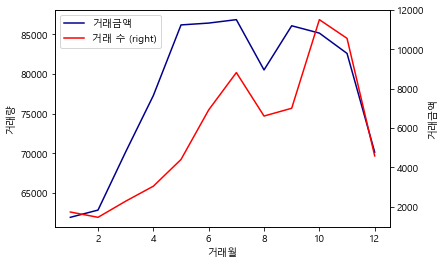

In [127]:
graph1=pd.concat([countByMonth,countByPrice],axis=1)

plt.figure(figsize=(20,10))
ax=graph1.plot(kind="line",y="거래금액",color="DarkBlue")
ax2=graph1.plot(kind="line",y="거래 수",secondary_y=True,color="Red",ax=ax)

ax.set_ylabel('거래량')
ax2.set_ylabel('거래금액')
# plt.tight_layout()
plt.plot()
plt.show()
# ax=countByMonth.plot(kind='line', x=countByMonth["거래월"], y="거래금액", color='DarkBlue')

# ax2=countByPrice.plot(kind='line', x="거래월", y="거래금액", secondary_y=True,color='Red', ax=ax)

# ax.set_ylabel('거래량')
# ax2.set_ylabel('거래금액')
# plt.tight_layout()
# plt.show()

### Coherence 비교

ValueError: Coherence is calculated by averaging over *NFFT*
length segments.  Your signal is too short for your choice of *NFFT*.


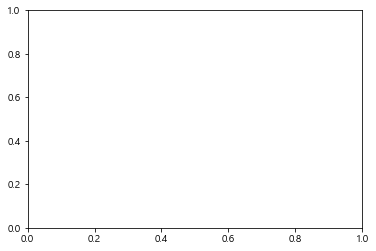

In [121]:
plt.cohere(x=graph1["거래 수"],y=graph1["거래금액"],NEFT=1)


In [119]:
len(graph1["거래 수"])

12

### 시군구별 거래량과 거래금액의 상관관계

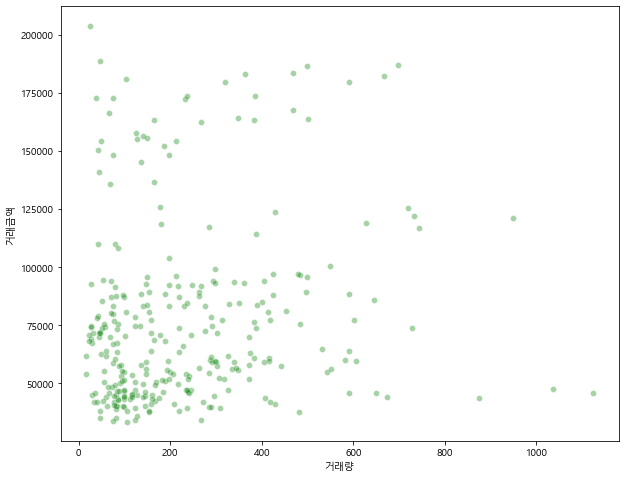

In [124]:

temp=final.pivot_table(index=["시군구명","거래월"],values="거래금액",aggfunc=["count","mean"])
temp.columns=["거래량","거래금액"]
plt.figure(figsize=(10,8))
sns.scatterplot(x="거래량",y="거래금액",alpha=0.35,data=temp,color="green")

### 6. 가격 변동 그래프 시각화-> 앞으로 오를 가능성 있는 동네 분석, 떨어질 동네 분석,

In [31]:
final

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",강동구
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",강동구
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",강동구
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",강동구


## 5. 시각화
#### 시각화 그래프는 7개 이상 나와야 합니다.
    - 각각의 그래프마다 분석에 있어서 세웠던 전략과 시각화 목적을 간단한 코멘트를 달아주세요
#### 수업시간에 언급하지 않은 새로운 패턴의 그래프는 3개 이상 사용하시기 바랍니다.
    - 그래프에 대한 간단한 설명과 함께 코멘트로 직접 달아주세요

#### 작업시간은 오후 3시까지 생각하고 있습니다.
    - 최종 발표시간은 4시입니다.